# 유튜브 랭킹 시각화


In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 재시작

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_순위.csv to 유튜브_순위.csv


In [4]:
df = pd.read_csv(filename)
df

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223
...,...,...,...,...,...
995,게임,미소,"510,000","210,770,000","3,084"
996,미분류,밉지않은 관종언니,"510,000","67,740,000",170
997,미분류,복지마블TV [Welfare Marble],"510,000","49,960,000",240
998,음식/요리/레시피,Muggo,"510,000","183,720,000","1,388"


In [8]:
# 구독자수 --> 구독자수2 (int)
# int('1,024')          -> , 가 있으면 int 사용 불가
# df['구독자수2'] = df.구독자수.astype(int) 불가
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [14]:
def str2int(x):
    return int(x.replace(',',''))

In [16]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오수 TOP 20(채널명, 비디오수) 막대그래프

In [60]:
df2 = df.sort_values(by='비디오수2', ascending=False).head(20)
df2

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
154,뉴스/정치/사회,YTN news,"2,500,000","5,462,390,000","553,462",2500000,553462
706,뉴스/정치/사회,연합뉴스TV,"700,000","918,130,000","362,555",700000,362555
59,TV/방송,SBS Drama,"5,480,000","5,750,870,000","340,878",5480000,340878
56,TV/방송,SBS Entertainment,"5,720,000","6,664,750,000","216,725",5720000,216725
337,뉴스/정치/사회,KBS News,"1,320,000","1,844,530,000","176,159",1320000,176159
973,뉴스/정치/사회,Arirang News,"530,000","237,210,000","123,886",530000,123886
243,뉴스/정치/사회,JTBC News,"1,710,000","2,399,540,000","116,376",1710000,116376
290,뉴스/정치/사회,MBCNEWS,"1,500,000","3,383,580,000","115,414",1500000,115414
112,TV/방송,KBS Drama,"3,470,000","4,261,110,000","114,095",3470000,114095
230,뉴스/정치/사회,SBS 뉴스,"1,780,000","2,672,520,000","111,308",1780000,111308


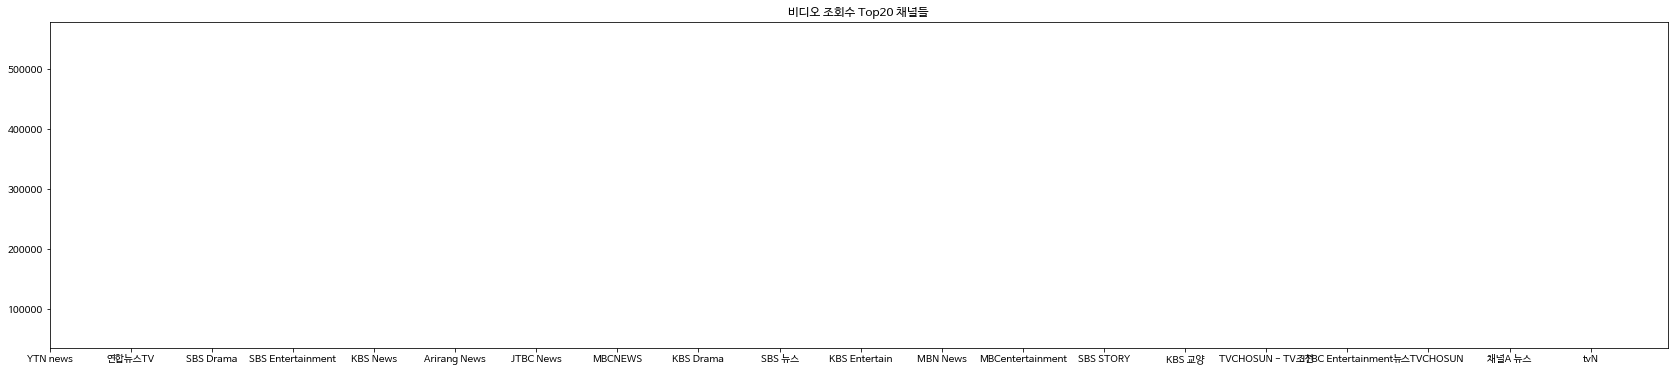

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(29, 6))
x = np.arange(len(y))
y = df20.비디오수2.values
xlabel = df20.채널명.values

plt.title("비디오 조회수 Top20 채널들")
plt.barh(x, y)
plt.xticks(x, xlabel)
plt.xlabel=('채널명')
plt.ylabel=('비디오수')
plt.show()

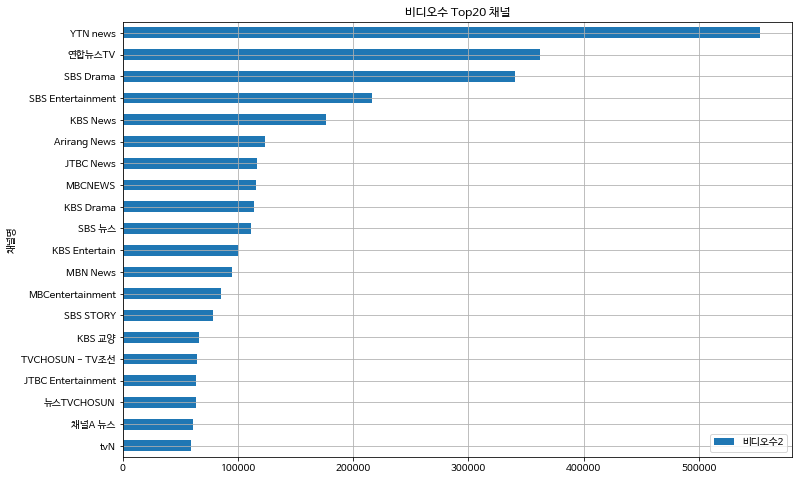

In [75]:
df20 = df[['채널명', '비디오수2']].sort_values(by = '비디오수2', ascending = False)
df20.set_index('채널명', inplace=True)
df20.head(20).sort_values(by='비디오수2').plot(kind = 'barh', grid = True, figsize = (12,8))
plt.title('비디오수 Top20 채널')
plt.show()

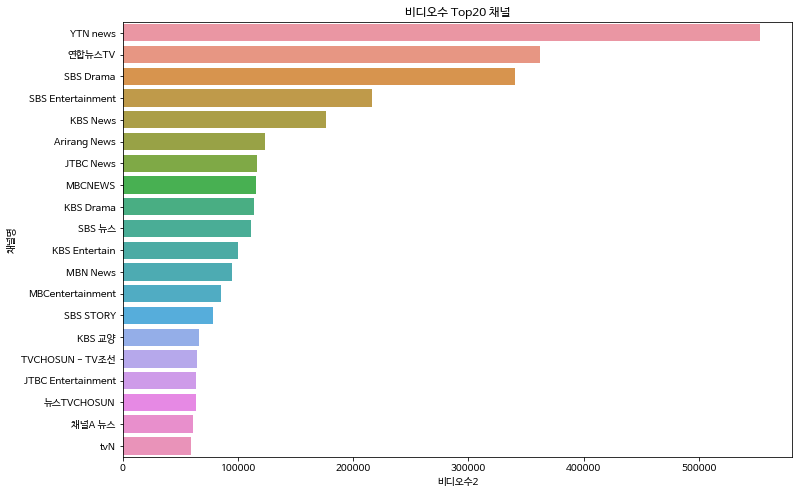

In [70]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='비디오수2', data = df2)

plt.title('비디오수 Top20 채널')
plt.show()

- 조회수 기준 Top 20 채널

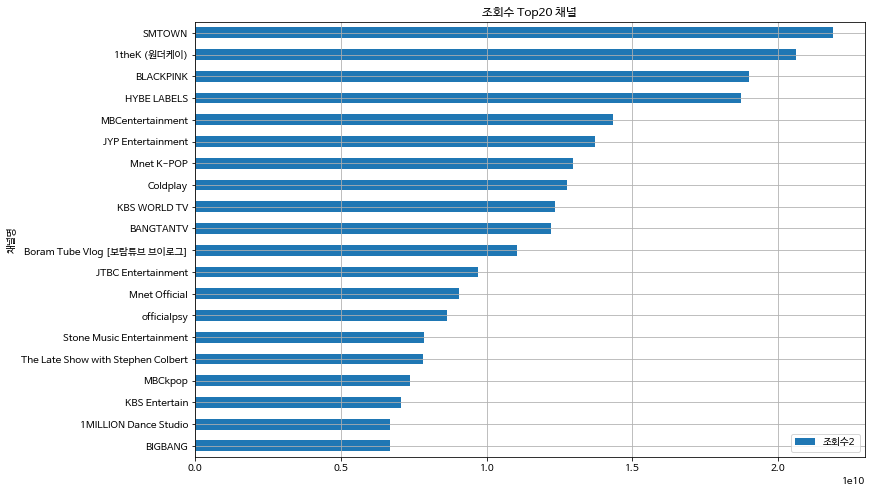

In [93]:
df['조회수2'] = df.조회수.apply(lambda x: int(x.replace(',','')))

df3 = df[['채널명', '조회수2']].sort_values(by = '조회수2', ascending = False).head(20)
df3.set_index('채널명', inplace=True)
df3.sort_values(by='조회수2').plot(kind = 'barh', grid = True, figsize = (12,8))
plt.title('조회수 Top20 채널')
plt.show()

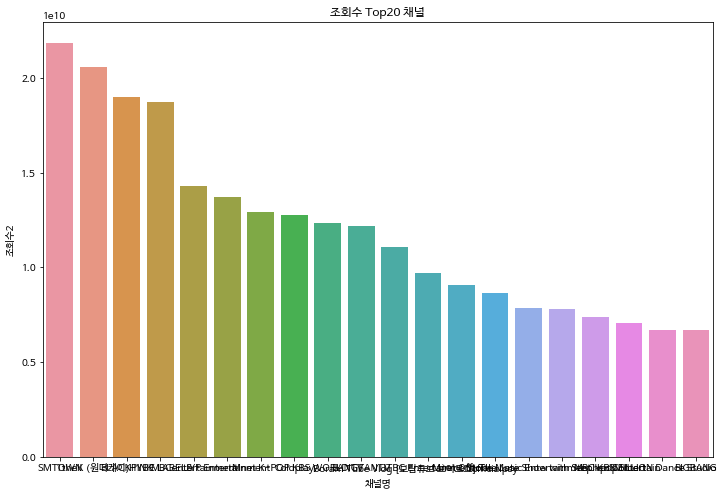

In [92]:
plt.figure(figsize=(12,8))
sns.barplot(x= '채널명', y='조회수2', data = df[['채널명', '조회수2']].sort_values(by = '조회수2', ascending = False).head(20))

plt.title('조회수 Top20 채널')
plt.show()

- 카테고리 별 채널 수 분포

In [94]:
df.카테고리.value_counts()

음악/댄스/가수     171
TV/방송        146
미분류          114
키즈/어린이        88
음식/요리/레시피     85
게임            74
BJ/인물/연예인     71
뉴스/정치/사회      53
패션/미용         44
취미/라이프        38
영화/만화/애니      33
교육/강의         22
애완/반려동물       19
주식/경제/부동산      8
스포츠/운동         8
IT/기술/컴퓨터      8
해외             6
회사/오피셜         5
국내/해외/여행       4
자동차            2
취미             1
Name: 카테고리, dtype: int64

In [100]:
dfc = df.카테고리.value_counts()       # 시리즈를 데이터 프레임으로, 크기순 sorting 되어있음

In [97]:
df[['카테고리', '채널명']].groupby('카테고리').count()      # 카테고리 가나다 순

,채널명
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


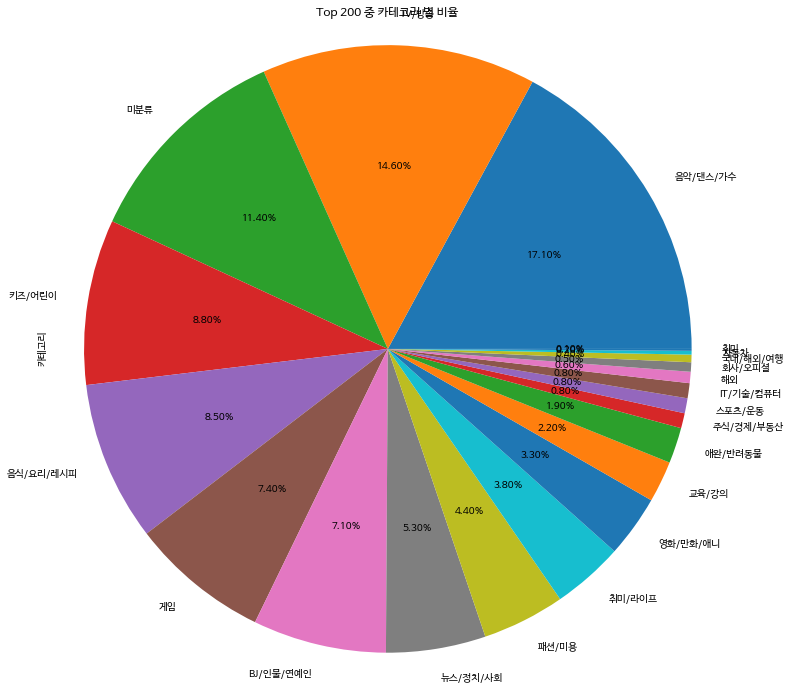

In [102]:
plt.figure(figsize=(12,12))
dfc.plot.pie(autopct = '%.2f%%')
plt.title('Top 200 중 카테고리 별 비율')
plt.axis('equal')       # 파이차트는 필수!!!
plt.show()

In [106]:
df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count', 'sum'])

,구독자수2
,sum
카테고리,
BJ/인물/연예인,97560000
IT/기술/컴퓨터,7960000
TV/방송,229720000
게임,67170000
교육/강의,23420000
국내/해외/여행,3440000
뉴스/정치/사회,71020000
미분류,143340000


- 카테고리 별 구독자 수

In [113]:
df4 = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count', 'sum']) \
                .reset_index().sort_values(by=('구독자수2', sum), ascending = False)

plt.figure(figsize = (12,8))
sns.barplot(x = '구독자수2')

,채널수,구독자수 합계
카테고리,,
음악/댄스/가수,171,674180000
키즈/어린이,88,257740000
TV/방송,146,229720000
음식/요리/레시피,85,180570000
미분류,114,143340000
BJ/인물/연예인,71,97560000
뉴스/정치/사회,53,71020000
게임,74,67170000
취미/라이프,38,47890000


In [ ]:
df4 = df.groupby('카테고리').sum()

plt.figure(figsize=(12,8))
sns.barplot(x = '구독자수2', y = df4.index, data = df)

In [112]:
df4 = df.groupby('카테고리').sum()
df4

,구독자수2,비디오수2,조회수2
카테고리,,,
BJ/인물/연예인,97560000,60843,35466580000
IT/기술/컴퓨터,7960000,11714,1849560000
TV/방송,229720000,1586604,153320740000
게임,67170000,215460,48642980000
교육/강의,23420000,20660,5193460000
국내/해외/여행,3440000,4456,1298020000
뉴스/정치/사회,71020000,2624519,82017350000
미분류,143340000,86959,49320790000
스포츠/운동,10840000,43635,3437560000
